In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
elle_rose = pd.read_csv('./blackpink/elle_R.csv', sep='|', encoding = 'utf-8')
cosmo_rose = pd.read_csv('./blackpink/cosmo_R.csv', sep='|', encoding = 'utf-8')
marie_rose = pd.read_csv('./blackpink/marie_R.csv', sep='|', encoding = 'utf-8')

## 전처리

### 기호 삭제

In [4]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

### 디자이너나 브랜드명 replace

## list(article_list) 생성 후 append

In [5]:
contents_list = []

In [6]:
mag_rose = [elle_rose, cosmo_rose, marie_rose]

In [7]:
magazine_list = []
article_list = []
for magazine in mag_rose:
    articles = magazine['word_rose']
    for article in articles:
        article_list.append(article)

In [8]:
len(article_list)

56

### 브랜드 및 디자이너 이름 대체

## 트위터 패키지 안에 konlpy 모듈 호출

In [9]:
from konlpy.tag import Twitter

In [10]:
twitter = Twitter()

C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [11]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


56


In [12]:
sentences_tag[0]

[("['\\',", 'Punctuation'),
 ('"', 'Punctuation'),
 ('로제', 'Noun'),
 ('가', 'Josa'),
 ('‘', 'Foreign'),
 ('꾸안', 'Verb'),
 ('꾸', 'Verb'),
 ("\\'", 'Punctuation'),
 ('데', 'Noun'),
 ('일리', 'Noun'),
 ('룩', 'Noun'),
 ('으로', 'Josa'),
 ('고른', 'Verb'),
 ('슈즈', 'Noun'),
 ('는', 'Josa'),
 ('어그', 'Noun'),
 ('슬리퍼', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('발등', 'Noun'),
 ('을', 'Josa'),
 ('넓게', 'Adjective'),
 ('덮은', 'Verb'),
 ('시어', 'Noun'),
 ('링', 'Noun'),
 ('디테', 'Noun'),
 ('일이', 'Noun'),
 ('귀여운', 'Adjective'),
 ('인상', 'Noun'),
 ('을', 'Josa'),
 ('풍기는데요', 'Verb'),
 (',', 'Punctuation'),
 ('그녀', 'Noun'),
 ('는', 'Josa'),
 ('블랙', 'Noun'),
 (',', 'Punctuation'),
 ('네이비', 'Noun'),
 ('처럼', 'Josa'),
 ('톤', 'Noun'),
 ('다운', 'Noun'),
 ('된', 'Verb'),
 ('룩', 'Noun'),
 ('과', 'Josa'),
 ('매치', 'Noun'),
 ('하고', 'Josa'),
 ('슈즈', 'Noun'),
 ('의', 'Josa'),
 ('컬러', 'Noun'),
 ('와', 'Josa'),
 ('비슷한', 'Adjective'),
 ('크로스', 'Noun'),
 ('보디', 'Noun'),
 ('백', 'Noun'),
 ('을', 'Josa'),
 ('짧게', 'Adjective'),
 ('

In [13]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [14]:
verb_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Verb']:
            verb_list.append(word)

In [15]:
verb_list[:20]

['꾸안',
 '꾸',
 '고른',
 '덮은',
 '풍기는데요',
 '된',
 '즐겼습니다',
 '배우는',
 '쓰는',
 '넘겨',
 '온전히',
 '드러내기',
 '덮어',
 '쓰면',
 '감춰',
 '보일',
 '빠진',
 '묶어',
 '빼내',
 '주는']

### 1. 명사, 형용사, 관형사, 알파벳, 외국어 품사만 선별해 리스트에 담기

In [16]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign']:
            noun_adj_list.append(word)

In [17]:
len(noun_adj_list)

5381

In [18]:
noun_adj_list[:20]

['로제',
 '‘',
 '데',
 '일리',
 '룩',
 '슈즈',
 '어그',
 '슬리퍼',
 '입니다',
 '발등',
 '넓게',
 '시어',
 '링',
 '디테',
 '일이',
 '귀여운',
 '인상',
 '그녀',
 '블랙',
 '네이비']

In [19]:
noun_adj_list[:10]

['로제', '‘', '데', '일리', '룩', '슈즈', '어그', '슬리퍼', '입니다', '발등']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [20]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('로제', 95), ('‘', 83), ('것', 77), ('블랙', 76), ('핑크', 60), ('수', 49), ('리사', 40), ('제니', 39), ('때', 39), ('생각', 36), ('지수', 34), ('모습', 32), ('그', 31), ('있는', 29), ('더', 25), ('전', 25), ('걸', 25), ('사람', 25), ('제', 23), ('같아요', 23), ('스타일', 22), ('위', 22), ('로', 21), ('음악', 21), ('헤어', 20), ('같은', 20), ('톱', 20), ('말', 20), ('무대', 20), ('그녀', 19), ('있어요', 19), ('어떤', 19), ('게', 19), ('가장', 19), ('이', 18), ('“', 18), ('”', 18), ('컬러', 17), ('모두', 17), ('커버', 17), ('자신', 16), ('룩', 15), ('멤버', 15), ('정말', 15), ('데뷔', 15), ('저희', 15), ('요', 15), ('엘르', 14), ('〉', 14), ('팬', 14), ('〈', 13), ('저', 13), ('시간', 13), ('매치', 12), ('의', 12), ('요즘', 12), ('마음', 12), ('부츠', 12), ('스커트', 12), ('영상', 11), ('다른', 11), ('곡', 11), ('레더', 11), ('있을', 10), ('거', 10), ('듯', 10), ('중', 10), ('생', 10), ('뮤직비디오', 10), ('차트', 10), ('칭찬', 10), ('좋은', 10), ('건', 10), ('스스로', 10), ('시작', 10), ('해', 10), ('연습', 10), ('항상', 10), ('사진', 10), ('있다', 10), ('「', 10), ('」', 10), ('각자', 10), ('스타', 10), ('언니', 10), ('패턴

In [21]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [22]:
count = Counter(noun_adj_list)

In [23]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('로제', 95)
('‘', 83)
('것', 77)
('블랙', 76)
('핑크', 60)
('수', 49)
('리사', 40)
('제니', 39)
('때', 39)
('생각', 36)
('지수', 34)
('모습', 32)
('그', 31)
('있는', 29)
('더', 25)
('전', 25)
('걸', 25)
('사람', 25)
('제', 23)
('같아요', 23)
('스타일', 22)
('위', 22)
('로', 21)
('음악', 21)
('헤어', 20)
('같은', 20)
('톱', 20)
('말', 20)
('무대', 20)
('그녀', 19)
('있어요', 19)
('어떤', 19)
('게', 19)
('가장', 19)
('이', 18)
('“', 18)
('”', 18)
('컬러', 17)
('모두', 17)
('커버', 17)
('자신', 16)
('룩', 15)
('멤버', 15)
('정말', 15)
('데뷔', 15)
('저희', 15)
('요', 15)
('엘르', 14)
('〉', 14)
('팬', 14)
('〈', 13)
('저', 13)
('시간', 13)
('매치', 12)
('의', 12)
('요즘', 12)
('마음', 12)
('부츠', 12)
('스커트', 12)
('영상', 11)
('다른', 11)
('곡', 11)
('레더', 11)
('있을', 10)
('거', 10)
('듯', 10)
('중', 10)
('생', 10)
('뮤직비디오', 10)
('차트', 10)
('칭찬', 10)
('좋은', 10)
('건', 10)
('스스로', 10)
('시작', 10)
('해', 10)
('연습', 10)
('항상', 10)
('사진', 10)
('있다', 10)
('「', 10)
('」', 10)
('각자', 10)
('스타', 10)
('언니', 10)
('패턴', 10)
('라인', 9)
('분위기', 9)
('로랑', 9)
('등', 9)
('화보', 9)
('오늘', 9)
('촬영', 9)
('K', 9)


## 워드클라우드 만들기

In [24]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [25]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [26]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [27]:
from wordcloud import WordCloud

In [28]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

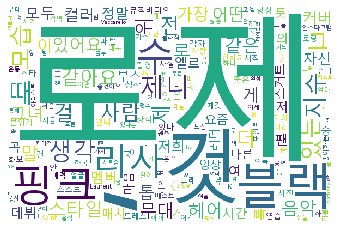

In [30]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('rose_adj_twitter.png')